## GRADUATE ADMISSION - CAPSTONE PROJECT 1


* Problem Statement
* Loading the data
* Data Wrangling and Analysis
     - Renaming the inconsistent column names
     - Detecting and calculating Outliers
* Problem consideration
     - Taking this as a classification problem
* Model development Using Logistic Regression
     - Creating a machine learning model using Logistic Regression 
     - Concept in short
     - Accuracy and Confusion matrix
     - Plotting ROC curve
* Hyper parameters tuning
     - Hyper parameter tuning using "grid search cross-validation"
* Comparing the accuracy of the model without hyper parameter and with Hyper parameter
     - Testing an individual by taking one example of new data
* Alternate model:
     - Random Forest Classifier model
* Story
* Conclusion

# Problem Statement : 

Prediction of Chance of Admit for an aspirant for Masters Programs

DATA SOURCE : Kaggle



# Loading data

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('E:/Data Science/14872_228180_bundle_archive_capstone1/Admission_Predict_Ver1.1.csv')

# Data Wrangling and Analysis

In [332]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


 # - Renamed inconsistent columns

In [333]:
df.shape
df.rename(columns = {'Chance of Admit ':'Chance of Admit'}, inplace = True)
df.rename(columns = {'LOR ':'LOR'}, inplace = True)
df.columns
df_cleaned = df


# - Detecting and calculating outliers

- Calculating outliers using z-score method:
  z-score method basically gets the outliers by calculating the ratio of differece between the observation with the mean value
  to the standard deviation. 
  If X is the obervation and u is the mean of the observations and S is the standard deviation, the z-score will be calculated 
  as below
                              z-score = (X-u)/S
        * If for suppose we considered out threshold of standard deviation as 3 (3rd standard deviation)
          then if z-score is > 3 , it is considered to be an outlier

In [334]:
# Function to calculate z-score
import numpy as np 
from scipy import stats

outliers = []
def detect_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:        
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [335]:
detect_outliers(df_cleaned['GRE Score'])

[]

In [336]:
detect_outliers(df_cleaned['TOEFL Score'])

[]

In [337]:
detect_outliers(df_cleaned['SOP'])

[]

In [338]:
detect_outliers(df_cleaned['LOR'])

[]

In [339]:
detect_outliers(df_cleaned['CGPA'])

[]

In [340]:
detect_outliers(df_cleaned['Chance of Admit'])

[]

The above things show us that this data doesn't have outliers. This meand no data point is greater than 3rd standard deviation

 Lets view the outliers graphically using box plots

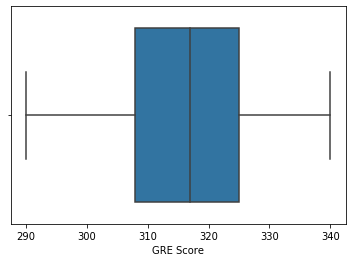

In [341]:
import seaborn as sns
sns.boxplot(x=df_cleaned['GRE Score'])

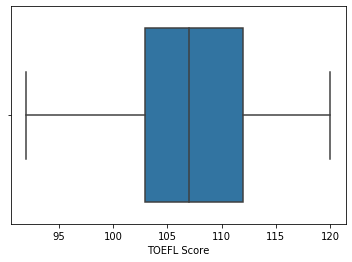

In [342]:
sns.boxplot(x=df_cleaned['TOEFL Score'])

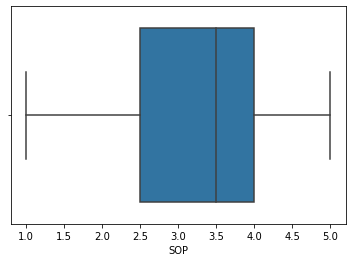

In [343]:
sns.boxplot(x=df_cleaned['SOP'])

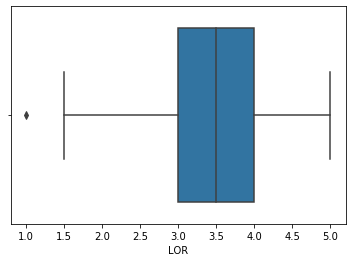

In [344]:
sns.boxplot(x=df_cleaned['LOR'])

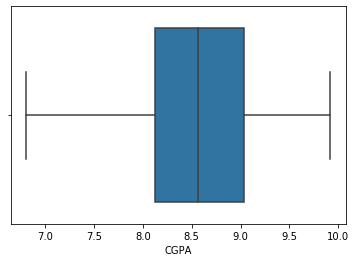

In [345]:
sns.boxplot(x=df_cleaned['CGPA'])

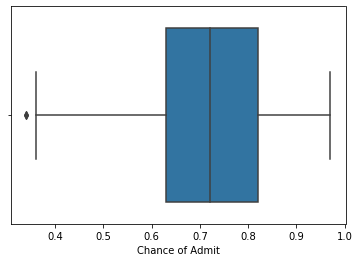

In [346]:
sns.boxplot(x=df_cleaned['Chance of Admit'])

In [347]:
#Getting a few statistics
df_cleaned.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [348]:
#Printing dataset by sorting University Rating in descending order
data_sorted = df_cleaned.sort_values('University Rating', ascending=False)
data_sorted[['University Rating', 'Chance of Admit']]

,University Rating,Chance of Admit
337,5,0.94
110,5,0.61
108,5,0.93
234,5,0.91
235,5,0.88
...,...,...
457,1,0.37
458,1,0.69
28,1,0.46
273,1,0.52


Text(0.5, 0, 'Chance of Admit')

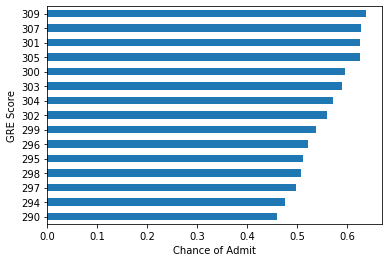

In [349]:
#bar plot GRE Score vs Chance of Admit
x = df.groupby("GRE Score")['Chance of Admit'].mean().sort_values().head(15)
x.plot(kind= 'barh')
plt.xlabel('Chance of Admit') 


Text(0, 0.5, 'Chance of Admit')

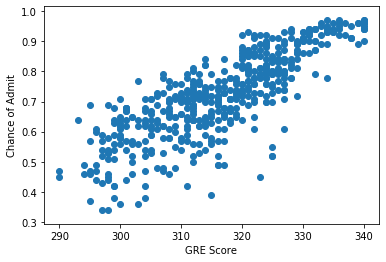

In [350]:
#Scatterplot between Chance of Admit and GRE Score
df_cleaned[['GRE Score', 'Chance of Admit']]
plt.scatter(df_cleaned[['GRE Score']], df_cleaned[['Chance of Admit']])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')


Text(0.5, 0, 'Chance of Admit')

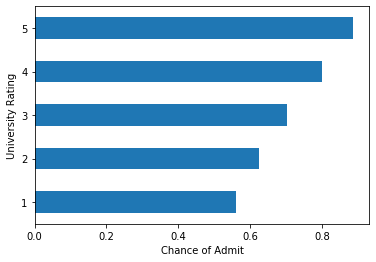

In [351]:
# This is the graph that shows about the indivudual who has a specific probability of Chance of Admit getting admitted into top
# universities (in this case University rating with 4 and 5 are considered as the top rated universities)
x = df.groupby("University Rating")['Chance of Admit'].mean().sort_values().head(15)
x.plot(kind= 'barh')
plt.xlabel('Chance of Admit') 

In [352]:
#What is the highest chance of admission and lowest chance of admission
max_COA = max(df_cleaned['Chance of Admit'])
min_COA = min(df_cleaned['Chance of Admit'])

In [353]:
print(max_COA)
print(min_COA)

0.97
0.34


In [354]:
# Displaying those students records who has highest chance of getting admission and lowest chance of getting admission
values = ['0.97', '0.34']
df_cleaned[df_cleaned['Chance of Admit'].isin(values)]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
24,25,336,119,5,4.0,3.5,9.80,1,0.97
92,93,298,98,2,4.0,3.0,8.03,0,0.34
143,144,340,120,4,4.5,4.0,9.92,1,0.97
202,203,340,120,5,4.5,4.5,9.91,1,0.97
203,204,334,120,5,4.0,5.0,9.87,1,0.97
376,377,297,96,2,2.5,2.0,7.43,0,0.34


In [355]:
df_cleaned.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


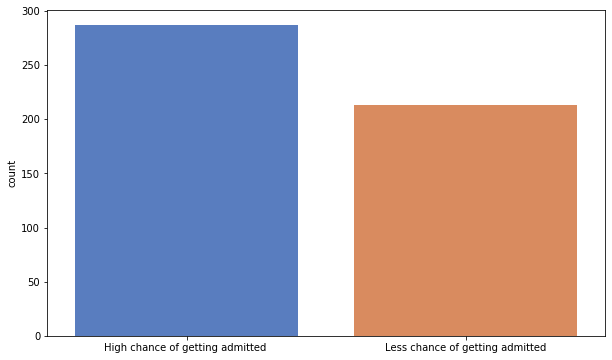

In [356]:
# Number of individuals getting higest chance and lowest chance of admission
import seaborn as sns
Chance= df["Chance of Admit"].values
category = []
for num in Chance:
    if num <= 0.7:
        category.append("Less chance of getting admitted")
    else:
        category.append("High chance of getting admitted ")
[(i, category.count(i)) for i in set(category)]
plt.figure(figsize=(10, 6))
sns.countplot(category, palette="muted")

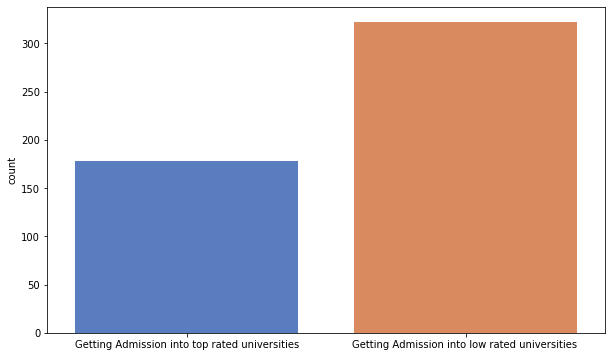

In [357]:
# This graph shows the number of individuals that will get admission into top rated Universities and number of individuals
# that get admission into low rated universites
import seaborn as sns
Chance= df["University Rating"].values
category = []
for num in Chance:
    if num >= 4:
        category.append("Getting Admission into top rated universities")
    else:
        category.append("Getting Admission into low rated universities ")
[(i, category.count(i)) for i in set(category)]
plt.figure(figsize=(10, 6))
sns.countplot(category, palette="muted")

In [358]:
df1=df.drop(['Serial No.', 'University Rating','Research','Chance of Admit'], axis=1)

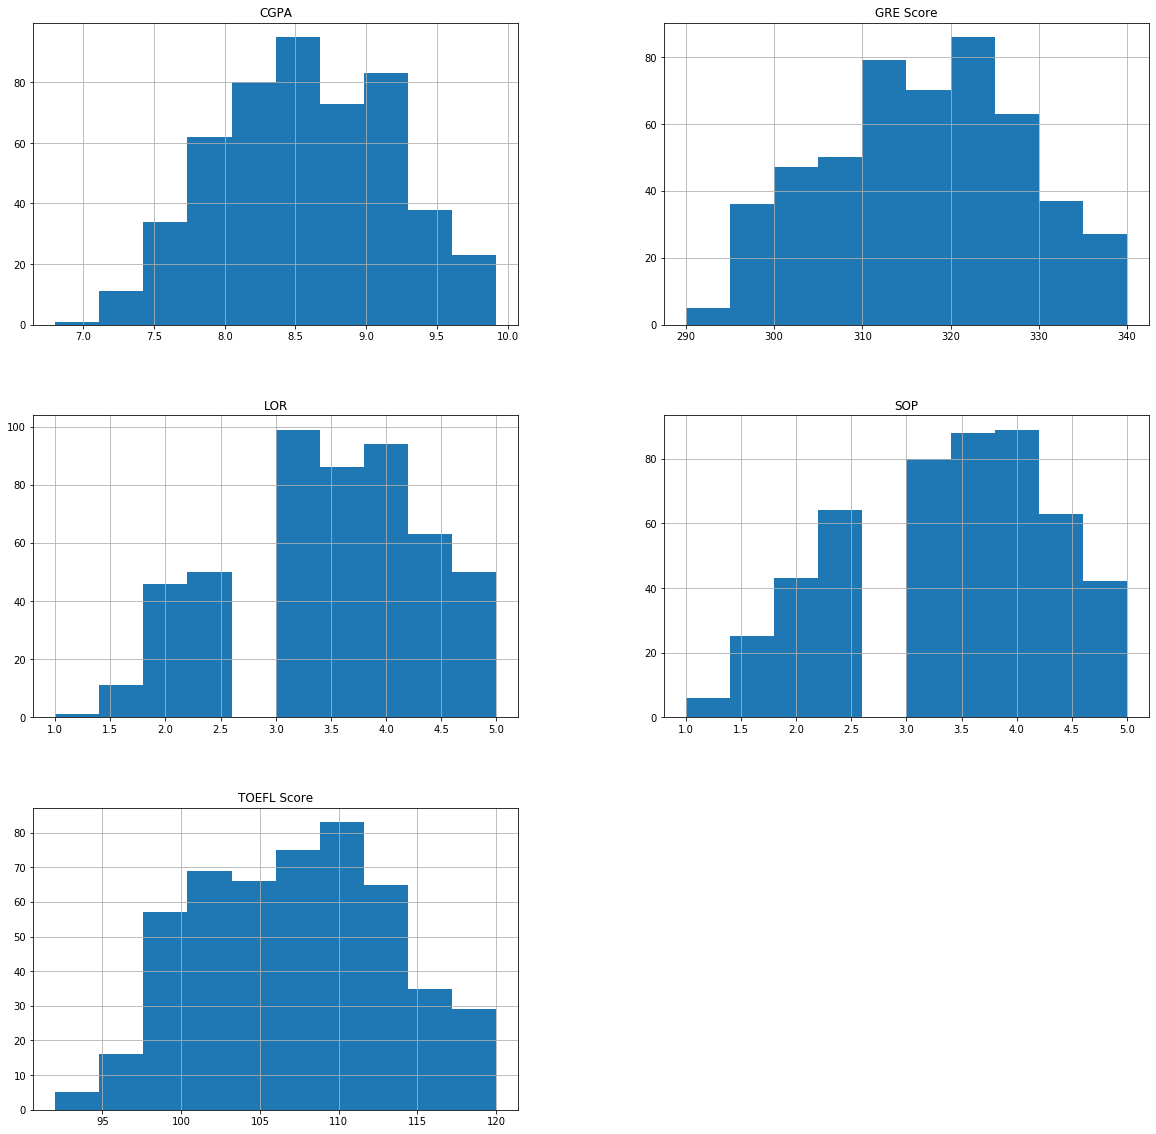

In [359]:
#Histograms for continuos variables
df1.hist (bins=10,figsize=(20,20))
plt.show ()

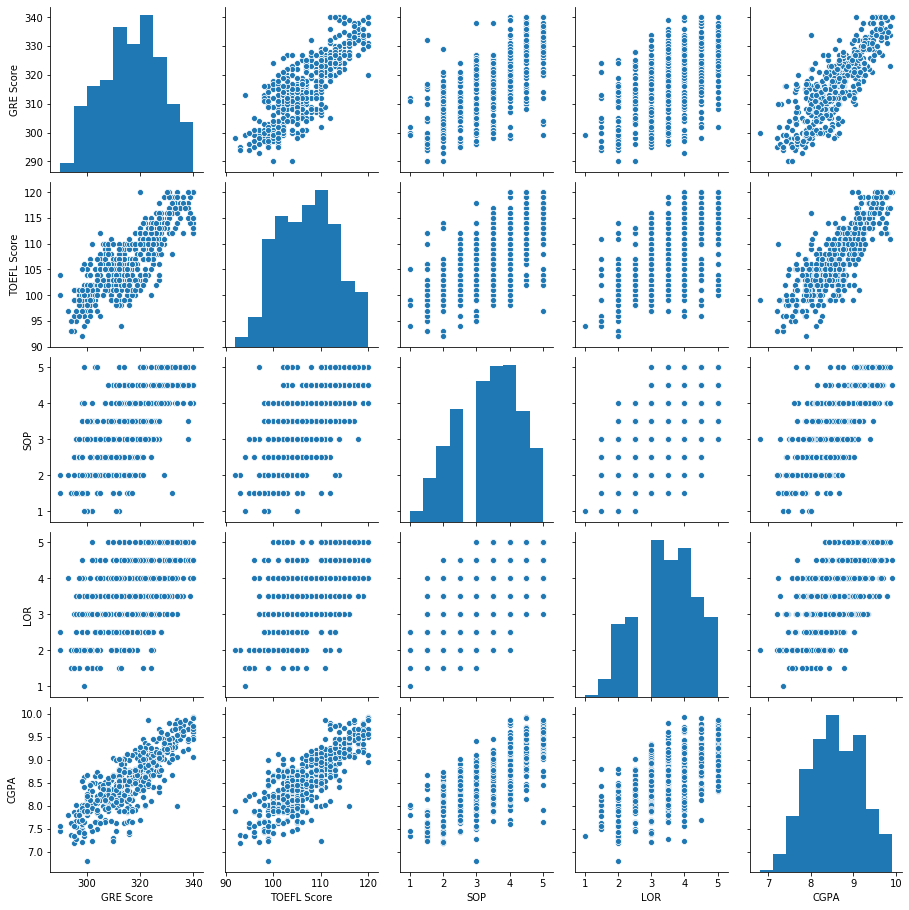

In [360]:
sns.pairplot(df1)

#  Problem Consideration:
#  - Taking this as a classification problem

 - Adding 'Chance' column to this data set to change this problem as a classification problem which will have only 'zeroes'and 'ones'. This works when we put a threshold 

In [361]:
df_cleaned.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [362]:
df_cleaned.insert(9,"Chance",0,True)
df_cleaned.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [363]:
df_cleaned.loc[df_cleaned['Chance of Admit']> 0.7, ['Chance']] = '1'

In [364]:
df_cleaned['Chance'].value_counts()

1    287
0    213
Name: Chance, dtype: int64

#  Model development Using Logistic Regression:

#   - Creating a machine learning model using Logistic Regression

  # - Concept in short:  
    In statistics, the logistic model is used to model the probability of a certain class or event existing 
    such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes 
    of events such as determining whether an image contains a cat, dog, lion, etc.
    Here we considered this alogorithm to check/predict whether a given individual getting graduate admission or not

In [365]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
X = df_cleaned.iloc[:, 1:8] 
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [366]:
y=df_cleaned['Chance'].astype(int)

In [367]:
y.value_counts()

1    287
0    213
Name: Chance, dtype: int64

In [368]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [369]:
y_test.value_counts()

1    86
0    64
Name: Chance, dtype: int64

# Classification report

Classification report mainly shows - precision, recall, f1-score 
* High precision is nothing but low false positive rate, also called as positive predicted value
* High recall means actual happened things are Predicted correctly. Recall is called sensitivity or true positive rate
* F1score is twice of the ratio of product of precision and recall to sum of precision and recall

In [379]:
#model = LogisticRegression()
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#model.score(X_test, y_test)

from sklearn.metrics import confusion_matrix, classification_report
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        64
           1       0.88      0.84      0.86        86

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150



# Accuracy and confusion matrix

In [321]:
accuracy1=model.score(X_test,y_test)
print (accuracy1*100,'%')
cm = confusion_matrix(y_test, y_pred)
print(cm)

84.0 %
[[54 10]
 [14 72]]


[1][1] represents the values which are predicted to be false and are actually false.
[1][2] represents the values which are predicted to be true, but are false.
[2][1] represents the values which are predicted to be false, but are true.
[2][2] represents the values which are predicted to be true and are actually true.

# Plotting ROC graph

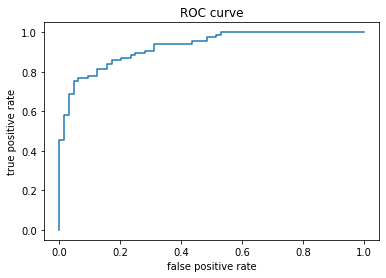

In [322]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba=model.predict_proba(X_test)[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_proba)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.plot(false_positive_rate,true_positive_rate)
plt.show()

# Hyper parameters tuning:

# - Hyper parameter tuning using "grid search cross-validation"

For the logistic regression , there is a regularization parameter C that influences the accuracy

-For smaller values of C, we get increased regularization strength which will create simple models which underfit the data
-For larger values of C, We get the lowered power of regularization which is allowed to increase its complexity and therefore
 overfit the data

In [323]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#Setting up the hyper parameter grid space
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
#Instantiate a logistic regression classifier
model1 = LogisticRegression()
#Instantiate the GridSearchCV object
model1_cv = GridSearchCV(model1, param_grid, cv=5)
#Fitting to data
model1_cv.fit(X_train,y_train)
print("Tuned Logistic Regression Parameters : {}".format(model1_cv.best_params_))
print("Best Score is : {}".format(model1_cv.best_score_*100), '%')

Tuned Logistic Regression Parameters : {'C': 0.4393970560760795}
Best Score is : 86.85714285714286 %


# Comparing the accuracy of the model without hyper parameter and with Hyper parameter
  - Score with out Hyper parameter 84%
  - Score with Hyper parameter 86.85%

# - Testing on new data

In [384]:
Ravi_Marks = [[400, 138, 4, 4.0, 4.3, 9.08, 1]]
df_new = pd.DataFrame(Ravi_Marks, columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'])
y_pred1=model1_cv.predict(df_new)
y_pred1

array([1])

 -  ANSWER: The above value is 1 . This means he will get the admission

# Alternate model :
 
 # - Random Forest Classifier

In [389]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
model2 = RandomForestClassifier(n_estimators=40)
model2.fit(X_train, y_train)
print(model2.score(X_test, y_test)*100, '%')

83.33333333333334 %


- Accuracy of the model using Random Forest Classifier is 83.33 percent

# Story

This workout clearly highlights the chance of a graduate getting admitted to the renowned Universities based on several factors such as GRE and TOEFL scores, 
thier graduation GPAs of the individual. The data has been taken from the Kaggle website.
There are multiple factors to be considered of getting more chance to be admitted into top Universities of USA.
This presentation is all about analyzing the past data and preparing a Machine Learning model that predicts the chance of admission of an individual.

Initially I have loaded the data, and did wrangling techniques: 
 - we renamed the column names which have inconsistent names to be consistent
 - Detecting Outliers
   I have used box plots and scatter plots to find the outliers graphically. But no outliers detected
   I have used z-score technique by taking 3rd standard deviation and found no outliers
Later I have done Exploratory Data Analysis:
 - Bar plot GRE Score vs Chance of Admit
 - Scatter plot Chance of Admit vs GRE Score
 - Bar plot University Rating vs Chance of Admit
 - Calculated highest probability for chance of admission and lowest probability for chance of admission
 - Displaying those students records who has highest chance of getting admission and lowest chance of getting admission
 - Did count plot for number of students has the high chance of admission and number of low chance of admission
 - Did histograms to see continuous variables
 - Did pairplots to check various relations

Conclusion:
-----------

- I have created a Machine learning model by taking the cleaned dataset using Logistic Regression.
  By classification report and confusion matrix , I got the model to be performed with 84% accuracy

- Later I wanted to do some hyper parameter tuning to increase the model accuracy, I have used the regularization parameter C to   fine tune the model and finally got 86.85% accuracy

- Also created model using Random Forest Classifier and got 83.33% accuracy

Apart from this model , we have some interesting things that we can observe in data analysis, like we can get the number of students approximately
who got admitted into top universities, and the behaviour of various features towards 'Chance of Admit'